# Logistic Regression to Neural Network From Scratch

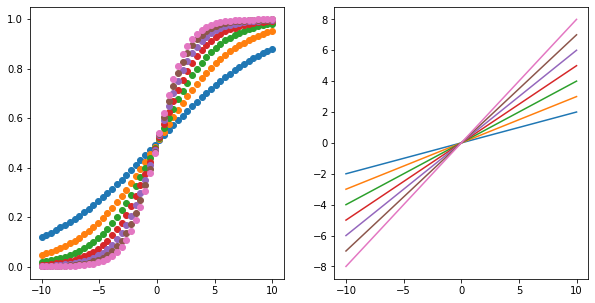

In [162]:
import matplotlib.pyplot as plt

bias = 0
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

for i in np.arange(0.2,0.8,0.1):
    x = np.linspace(-10,10)
    y = np.array([sigmoid(np.array([[i,1]]),np.array([[xi,bias]])) for xi in x])
    ax[0].scatter(x,y)
    ax[1].plot(x,x*i+bias)
    
plt.show()


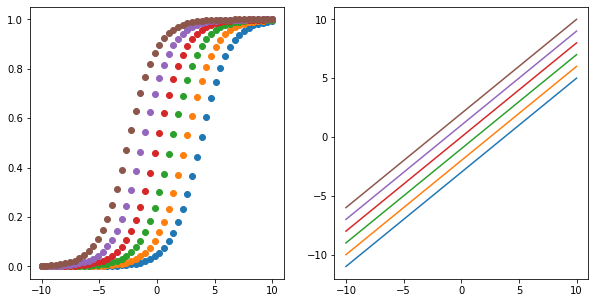

In [166]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

for bias in np.arange(-3,3,1):
    x = np.linspace(-10,10)
    y = np.array([sigmoid(np.array([[0.8,1]]),np.array([[xi,bias]])) for xi in x])
    ax[0].scatter(x,y)
    ax[1].plot(x,x*i+bias)
    
plt.show()

In [105]:
import numpy as np

def init_theta(topology:list):
    """Initialise the weights (theta) + bias for each layer in the network topology.
    For each layer a set of weights are generated with a shape of the current layer and previous layer + bias.
    
    Args:
        topology: A list describing the neural network topology.
        
    Returns:
        A list of numpy arrays defining a set of initilised neural network weights.
    """
    theta = []
    for i in range(1, len(topology)):
        theta.append(np.random.rand(topology[i], topology[i - 1] + 1))
    return theta


def init_delta(topology:list):
    """Initiate a list of delta values for each neuron in the network, defining the value by which each weight will be upadated during back prop.
    
    Args:
        topology: A list describing the neural network topology.
        
    Returns:
        A list of numpy arrays with value zero defining a set of values to update network weights by.    
    """
    delta = []
    for i in range(1, len(topology)):
        delta.append(np.zeros((topology[i], topology[i - 1] + 1)))
    return delta

def init_sig(topology:list):
    """Initiate a list of sigma values for each neuron in the network, defining the value by which each weight will be upadated during back prop.
    
    Args:
        topology: A list describing the neural network topology.
        
    Returns:
        A list of numpy arrays with value zero defining a set of values to update network weights by.    
    """
    sig = []
    for i in range(1, len(topology)):
        sig.append(np.zeros((topology[i])))
    return sig

def sigmoid(theta:list, x:list):
    """Sigmoid activation function sum(w*x)+bias.
            
    Args:
        theta: neural network weights.
        x: bias + neruon inputs
        
    Returns:
        Sigmoid output.    
    """
    return 1 / (1 + np.exp(np.sum((-1 * theta * x), axis=1)))

def d_sigmoid(x):
    """Derivative of sigmoid activation function.
            
    Args:
        x: bias + neruon inputs
        
    Returns:
        Derivative of sigmoid.    
    """
    return np.multiply(x, 1.0 - x)

def logistic_loss(network_output, y):
    """Logistic regression formula"""
    loss_zero = -y * np.log(network_output + 1e-9)
    loss_one = (1 - y) * np.log(1 - network_output + 1e-9)
    loss = np.sum(loss_zero - loss_one)
    return loss
    
def d_logistic_loss(output_layer,true_output):
    """Derivative of logistic loss"""
    return ((output_layer-true_output)/(output_layer*(1-output_layer)))

def update_theta(theta,delta,alpha,m):
    """Update the weights of the model (theta). theta new = theta - alpha*(1/m)*delta"""
    
    for i in range(0, len(theta), 1):
            theta[i] = theta[i] - (alpha * (1.0 / m) * (delta[i]))
            
    return theta

In [106]:
def construct_network(topology):
    """Initial values (zero) for the output of each layer in the network.
        
    Args:
        topology: A list describing the output shape of each layer in the neural network.
        
    Returns:
        A list of numpy arrays with value zero thats shape defines the number of outputs for each layer in the network.    
    """
    a_lj = []
    #input layer
    a_lj.append(np.ones(topology[0]))
    #hidden layer
    for i in range(1, len(topology) - 1):
        a_lj.append(np.ones(topology))
    #output layer
    a_lj.append(np.ones(topology[-1]))
    return a_lj

def forward_prop(x,a_lj,theta,bias):
    """Properagate a set of input values through each layer of the network.
        
    Args:
        x: Input array to the network
        a_lj: A list of numpy arrays representing the output of each neuron in each layer.
        theta: A list of numpy arrays representing the weights for each layer in the network.
        bias: A fixed bias for each hidden layer.
        
    Returns:
        A list of outputs for each layer of the network.
    """
    a_lj[0] = x
    for i in range(1, len(theta) + 1):
        a_lj_i = a_lj[i - 1]
        #Add Bias to all except output
        if (i != len(theta) + 1):
            a_lj_i = np.insert(a_lj_i, 0, bias, axis=0)
        
        new_a_lj = sigmoid(theta[i - 1], a_lj_i)
        
        #Updte a_lj
        a_lj[i] = new_a_lj
    return a_lj

In [108]:
import unittest
from unittest import mock
import numpy as np

def mock_random(*args):
    return np.zeros(args)

class TestNetwork(unittest.TestCase):
    
    def test_init_theta(self):
        with mock.patch('numpy.random.rand', mock_random):
            
            topology = [1,3,4,5]
            weights = init_theta(topology)
            
            assert len(topology) - 1 == len(weights)

            for i in range(len(weights)):
                assert weights[i].shape[0] == topology[i+1]
                assert weights[i].shape[1] == topology[i]+1


    def test_init_delta(self):
        with mock.patch('numpy.random.rand', mock_random):
            
            topology = [1,3,4,5]
            weights = init_delta(topology)
            
            assert len(topology) - 1 == len(weights)

            for i in range(len(weights)):
                assert weights[i].shape[0] == topology[i+1]
                assert weights[i].shape[1] == topology[i]+1

    def test_init_sig(self):
        with mock.patch('numpy.random.rand', mock_random):
            
            topology = [1,3,4,5]
            weights = init_sig(topology)
            
            assert len(topology) - 1 == len(weights)

            for i in range(len(weights)):
                assert weights[i].shape[0] == topology[i+1]

    def test_construct_network(self):
        with mock.patch('numpy.random.rand', mock_random):
            
            topology = [1,3,4,5]
            a_lj = construct_network(topology)
            
            assert len(topology) == len(a_lj)
            
    def test_update_theta(self):
        
        theta = [np.array([0.2,0.5]),np.array([0.3,0.4])]
        delta = [np.array([0.1,0.1]),np.array([0.1,0.1])]
        
        alpha = 0.5
        m = 1
        
        new_theta = update_theta(theta,delta,alpha,m)

        assert np.array_equal(new_theta[0].round(2),np.array([0.15, 0.45]).round(2))
        assert np.array_equal(new_theta[1].round(2),np.array([0.25, 0.35]).round(2))

    def test_sigmoid(self):
        out = sigmoid(np.array([[0.1,0.1]]),np.array([[0.5,0.5]]))
        assert 0.52 == out.round(2)[0]
        
    def test_d_sigmoid(self):
        assert d_sigmoid(np.array([0.1])).round(2)[0] == 0.09
        
    def test_logistic_loss(self):
        assert round(logistic_loss(np.array([0]),np.array([0])),2) == 0
        assert round(logistic_loss(np.array([0]),np.array([1])),2) == 20.72
        assert round(logistic_loss(np.array([1]),np.array([0])),2) == 20.72
        
    def test_forward_prop(self):

        x = [0.1]
        a_lj = [[0.1], np.array([0.0, 0.0]), np.array([0.0])]
        theta = [np.array([[0.1, 0.1],[0.1, 0.1]]),
                np.array([[0.1, 0.1, 0.1 ]])]
        
        out = forward_prop(x,a_lj,theta,1) 
        
        expected = [[0.1], np.array([0.5274723, 0.5274723]), np.array([0.55119359])]
        
        assert expected[0] == out[0]
        assert np.array_equal(np.round(expected[1],2) , np.round(out[1],2))
        assert np.array_equal(np.round(expected[2],2) , np.round(out[2],2))

unittest.main(argv=[''], verbosity=2, exit=False)

test_construct_network (__main__.TestNetwork) ... ok
test_d_sigmoid (__main__.TestNetwork) ... ok
test_forward_prop (__main__.TestNetwork) ... ok
test_init_delta (__main__.TestNetwork) ... ok
test_init_sig (__main__.TestNetwork) ... ok
test_init_theta (__main__.TestNetwork) ... ok
test_logistic_loss (__main__.TestNetwork) ... ok
test_sigmoid (__main__.TestNetwork) ... ok
test_update_theta (__main__.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.008s

OK


In [109]:

 def back_prop(a_lj, y,theta, delta, topology,bias=1):
    """ Assumes all layers are sigmoid (except input).
    In general we calculate error for each output, then weight update value.
    For each layer in the network and the corresponding neurons we need to determine a value to update the 
    corresponding weights by. This is done sequentially, starting with the output layer and working backwards 
    through each layer.
    
    For the output layer
        
    Args:
        a_lj: A list of numpy arrays representing the output of each neuron in each layer.
        y: True label array.
        delta: An array to track the updates to weight across batch.
        topology: The topology of the network (number of nodes per layer).
        theta: A list of numpy arrays representing the weights for each layer in the network.
        bias: A fixed bias for each hidden layer.
        
    Returns:
        A list of numpy arrays representing the update for each set of batches.
    """
    #sig is single batch item weight updates.
    sig = init_sig(topology)
    
    number_of_layers = len(a_lj) - 1

    # Calculate error of output for all nodes except input (as it does not have weights, nor error)
    #First error of output layer = Cost func derivative * out sigmoid derivative (possibly missing term here)
    sig[number_of_layers-1] = d_logistic_loss(a_lj[number_of_layers],y) * d_sigmoid(a_lj[number_of_layers])

    """
    Hidden layer errors (sig_lj):
    
    sig_lj = (derivative of sigmoid) * (derivative of next layer error)
    a1 = derivative of next layer error = sig_(l+1)j * theta_lj 
    a2 = derivative of sigmoid = sigmoid * (1 - sigmoid) = a2
    """
    #Remove Bias layer in theta
    theta_no_bias = []
    for i in range(len(theta)):
            temp = theta[i].copy()
            theta_no_bias.append(np.delete(temp, 0, axis=1))

    for l in range(len(sig) - 1, 0, -1):
            a1 = (np.transpose(theta_no_bias[l]).dot(sig[l]))
            a2 = d_sigmoid(a_lj[l])
            sig[l - 1] = np.multiply(a1, a2)
    """
    weight update (delta):
     For all except output
    weight update (delta_lj) = layer input * error of output
    layer input = a_lj
    error of output = sig_lj
    """
    for i in range(len(delta) - 1, -1, -1):
            a_lj_i = np.insert(a_lj[i], 0, bias, axis=0)
            outer = np.outer(sig[i], np.transpose(a_lj_i))
            delta[i] = (delta[i] + outer)

    return delta

In [110]:
def train(a_lj, network_topology, x_train, y_train, epochs=100, alpha=1, batch_size=10,bias=1):

        data_size = len(x_train)
        theta = init_theta(network_topology)

        for epoch in range(0, epochs):
            
            epoch_cost = []
            delta = init_delta(network_topology)
            
            for m_i in range(0, len(x_train)):
                
                if (m_i-1)%batch_size==0:
                    #reset weight updates array every batch_size
                    delta = init_delta(network_topology)
  
                a_lj = forward_prop(x_train[m_i],a_lj,theta,bias) 
                delta =  back_prop(a_lj, y_train[m_i], theta,delta, network_topology)
                cost_i = logistic_loss(a_lj[-1],y_train[m_i])
            
                epoch_cost.append(cost_i)
                
                if m_i%batch_size==0:
                    theta = update_theta(theta,delta,alpha,batch_size)
                    
            print(f"Epoch: {epoch}, Loss: {(0.5 / data_size) * np.sum(epoch_cost)}")

        return a_lj, theta

In [111]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

dataset = datasets.make_circles(n_samples=500,noise=0.1,factor=0.2, random_state=1)

features = dataset[0]
labels = dataset[1]

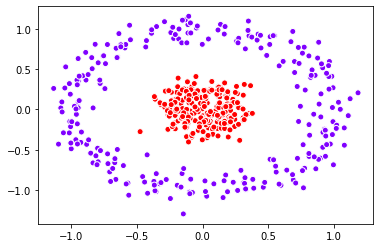

In [112]:

plt.scatter(features[:, [0]],
                            features[:, [1]],
                            c=labels,
                            cmap='rainbow',
                            edgecolors='w')

In [113]:
labels = labels.reshape(labels.shape[0],1)

data_len = features.shape[0]

x1_min = np.amin(features[:,0])
x1_max = np.amax(features[:,0])
x2_min = np.amin(features[:,1])
x2_max = np.amax(features[:,1])

X_train = features[:int(data_len*0.7)]
X_test = features[int(data_len*0.3):]
y_train = labels[:int(data_len*0.7)]
y_test = labels[int(data_len*0.3):]

In [114]:
X_train[:,[0]] = X_train[:,[0]]
X_train[:,[1]] = X_train[:,[1]]

In [118]:
featureNumber = 2
outputs = 1
network_topology = [featureNumber,4,3,outputs]
alpha = 0.2
bias = 1
theta = init_theta(network_topology)
a_lj = construct_network(network_topology)
a_lj, theta = train(a_lj, network_topology, X_train, y_train, epochs=300, alpha=alpha, batch_size=5)

Epoch: 0, Loss: 0.3525949749534463
Epoch: 1, Loss: 0.3529637293205749
Epoch: 2, Loss: 0.3529072818323095
Epoch: 3, Loss: 0.3528503953265731
Epoch: 4, Loss: 0.35279302642278615
Epoch: 5, Loss: 0.35273513276440577
Epoch: 6, Loss: 0.35267667493171234
Epoch: 7, Loss: 0.35261761448277495
Epoch: 8, Loss: 0.3525579117681724
Epoch: 9, Loss: 0.352497523484602
Epoch: 10, Loss: 0.35243639993179315
Epoch: 11, Loss: 0.3523744819340471
Epoch: 12, Loss: 0.35231169738149404
Epoch: 13, Loss: 0.3522479573359897
Epoch: 14, Loss: 0.35218315163159747
Epoch: 15, Loss: 0.35211714387890675
Epoch: 16, Loss: 0.3520497657550504
Epoch: 17, Loss: 0.3519808104261447
Epoch: 18, Loss: 0.3519100249047782
Epoch: 19, Loss: 0.3518371010906797
Epoch: 20, Loss: 0.35176166517604146
Epoch: 21, Loss: 0.3516832650159227
Epoch: 22, Loss: 0.3516013549658662
Epoch: 23, Loss: 0.3515152775696576
Epoch: 24, Loss: 0.35142424133530953
Epoch: 25, Loss: 0.3513272936606014
Epoch: 26, Loss: 0.3512232877524707
Epoch: 27, Loss: 0.3511108421

Epoch: 217, Loss: 0.0011404119244353044
Epoch: 218, Loss: 0.0011301024630374194
Epoch: 219, Loss: 0.001119975036190826
Epoch: 220, Loss: 0.0011100248542349287
Epoch: 221, Loss: 0.0011002472948409194
Epoch: 222, Loss: 0.001090637895737018
Epoch: 223, Loss: 0.0010811923478112567
Epoch: 224, Loss: 0.0010719064885690774
Epoch: 225, Loss: 0.0010627762959245426
Epoch: 226, Loss: 0.0010537978823054552
Epoch: 227, Loss: 0.0010449674890539936
Epoch: 228, Loss: 0.0010362814811056263
Epoch: 229, Loss: 0.0010277363419303614
Epoch: 230, Loss: 0.0010193286687211684
Epoch: 231, Loss: 0.0010110551678157457
Epoch: 232, Loss: 0.001002912650338357
Epoch: 233, Loss: 0.0009948980280495327
Epoch: 234, Loss: 0.0009870083093921312
Epoch: 235, Loss: 0.0009792405957229347
Epoch: 236, Loss: 0.0009715920777197512
Epoch: 237, Loss: 0.000964060031954406
Epoch: 238, Loss: 0.0009566418176229449
Epoch: 239, Loss: 0.0009493348734244079
Epoch: 240, Loss: 0.0009421367145805811
Epoch: 241, Loss: 0.0009350449299891807
Epoc

In [126]:
test_pred = []
count  = 0
for x,y in zip(X_train,y_train):

    a_lj = forward_prop(x,a_lj,theta,bias) 
    test_pred.append(np.round(a_lj[-1])[0]-y)
    if np.round(a_lj[-1])[0]==y[0]:
        count+=1


In [123]:
np.sum(test_pred)/len(test_pred)

0.0

In [124]:
 def classificaionContour( xmin, xmax, step,theta,bias):
        #contour = np.zeros(np.divide((np.abs(xmin)+xmax),step)*np.divide((np.abs(xmin)+xmax),step))
        contour = np.zeros(
            int(((np.abs(xmin) + np.abs(xmin)) / step) *
                (np.abs(xmin) + np.abs(xmin)) / step))

        #a_lj = self.construct_network()
        counter = 0

        for x in np.arange(xmin, xmax, step):
            for y in np.arange(xmin, xmax, step):
                ar = np.array([x, y])
                contour[counter] = forward_prop(ar,a_lj,theta,bias) [-1]
                counter += 1

        ns = int(np.sqrt(contour.shape[0]))
        return np.transpose(np.reshape(contour, (ns, ns)))

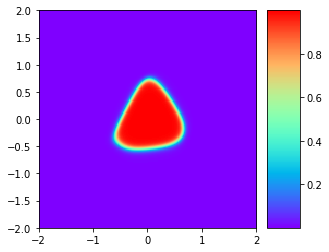

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1 as axes_grid1
np.random.seed(1)

contour = classificaionContour(-2, 2, 0.02,theta,bias)

fig = plt.figure()
grid = axes_grid1.AxesGrid(
    fig, 111, nrows_ncols=(1, 1), axes_pad = 0.5, cbar_location = "right",
    cbar_mode="each", cbar_size="15%", cbar_pad="5%",)

im1 = grid[0].imshow(contour, cmap='rainbow', interpolation='nearest',                           extent=[-2, 2, -2, 2],
)
grid.cbar_axes[0].colorbar(im1)

In [49]:
def softmax(theta,x):
    """Compute softmax values for each sets of scores in x."""
    O_x = np.sum((-1 * theta * x), axis=1)
    e_x = np.exp(O_x - np.max(O_x))
    return e_x / e_x.sum(axis=0) # only difference

def d_softmax(s):
    return np.diagflat(s) - np.dot(s, s.T)